In [1]:
import osmnx as ox
import pandas as pd

import numpy as np
import matplotlib.pyplot as pl

import networkx as nx

import os

import geopy

import sys

from copy import *

import seaborn as sns

import re

print(sns.__version__)  #ideally 0.9.0

0.9.0


In [2]:
#ROOT_DIR = "/home/dhw3172/projects/Plaques" 
ROOT_DIR = "/home/charles/Projects/Plaques"

In [3]:
sys.path.append(os.path.join(ROOT_DIR, "Python"))  #this is the important line!!!
os.chdir(os.path.join(ROOT_DIR, "Python")) 
os.getcwd()

'/home/charles/Projects/Plaques/Python'

In [4]:
from OsmnxStreets import *

In [5]:
print(ROOT_DIR)

/home/charles/Projects/Plaques


In [6]:
dfBbox=getHardCodedSJB_SaintRoch_VieuxQcBbox_4ExtremePoints()
dfBbox.head()

key_x     lng_x     lat_x key_y     lng_y     lat_y
0   min -71.24047  46.79089   min -71.24047  46.79089
1   min -71.24047  46.79089   max -71.19298  46.83216
2   max -71.19298  46.83216   min -71.24047  46.79089
3   max -71.19298  46.83216   max -71.19298  46.83216

In [7]:
getHardCodedSJB_SaintRoch_VieuxQcBbox_Centroid()

array([ 46.811525, -71.216725])

In [8]:
graphQcReduced =getQcGraphSubnetCentroidBbox(bufferKm=1)

In [9]:
#ox.plot_graph( graphQcReduced)

In [10]:
#pd.read_csv(os.path.join(ROOT_DIR,"Data","Csv","Streets", "uniqueStreetsWithLngLat.csv"),delimiter=",")

In [11]:
dfStreetEdges=getDfStreetEdges()
dfStreetEdges.head()

index               Street   lngStart   latStart     lngEnd     latEnd
0      0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753
1      1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131
2      3    rue Saint-Gabriel -71.218576  46.810208 -71.222092  46.808695
3      4         rue Aberdeen -71.228321  46.801381 -71.225280  46.803173
4      5        rue Richelieu -71.228021  46.806901 -71.213253  46.813998

In [12]:
checkBoxAll(dfStreetEdges,dfBbox)
 

True

In [13]:
numNodesBefore=len(graphQcReduced.nodes())
print(numNodesBefore)

1552


In [14]:
#getUniqueNodes(dfStreetEdges, 0)
dfNodes=getUniqueNodes(dfStreetEdges, 0)
print( np.min(dfNodes["lat"]) ,
np.max(dfNodes["lat"]),

np.min(dfNodes["lng"]),
np.max(dfNodes["lng"])
     )

removed 1 duplicate rows:
    index                  Street   lngStart   latStart     lngEnd    latEnd
9     10  rue Saint-Jean vieuxqc -71.215778  46.812134 -71.209147  46.81464 
There are  89 unique nodes
46.801154 46.818843 -71.231359 -71.204298


In [15]:
dfBox2by2=getHardCodedSJB_SaintRoch_VieuxQcBbox_2by2()
getMinMaxLngLat(graphQcReduced,dfBox2by2)

y -- lat:  [1690445108] : 46.8026003  --  [3950537815] : 46.8204949
x -- lng:  [2360989076] : -71.2297878  --  [297030030] : -71.2036901


True

In [17]:
graph,dfNodesWithIndex= addNodesGraph(graphQcReduced,dfStreetEdges)


removed 1 duplicate rows:
    index                  Street   lngStart   latStart     lngEnd    latEnd
9     10  rue Saint-Jean vieuxqc -71.215778  46.812134 -71.209147  46.81464 
There are  89 unique nodes


In [18]:
dfNodesWithIndex.head()

index        lng        lat
0  6336677267 -71.211626  46.808025
1  6336677268 -71.228938  46.807552
2  6336677269 -71.218576  46.810208
3  6336677270 -71.228321  46.801381
4  6336677271 -71.228021  46.806901

In [19]:
dfBox2by2=getHardCodedSJB_SaintRoch_VieuxQcBbox_2by2()
getMinMaxLngLat(graphQcReduced,dfBox2by2)

y -- lat:  [6336677184, 6336677273] : 46.801154  --  [3950537815] : 46.8204949
x -- lng:  [6336677195, 6336677284] : -71.231359  --  [297030030] : -71.2036901


True

In [20]:
dictLng=nx.get_node_attributes(graphQcReduced,"y")

minLng=getMinDict(dictLng)
minKey=[ k for k,v in dictLng.items() if v == minLng]
print(minKey,minLng)
myDf=pd.DataFrame.from_dict(dictLng,orient="index").reset_index().rename(columns={ "index": "nodeIdx", 0: "lat" })

#
# columns=[]

[6336677184, 6336677273] 46.801154


In [21]:
graphQcReduced.nodes[2360989076]

{'y': 46.82001, 'x': -71.2297878, 'osmid': 2360989076}

In [22]:
graphQcReduced.nodes[297030030]

{'y': 46.8162834, 'x': -71.2036901, 'osmid': 297030030}

In [23]:
graphQcReduced.nodes[6336677200]

{'osmid': 6336677200, 'y': 46.812719, 'x': -71.23114699999999}

In [24]:
graphQcReduced.nodes[6336677199]

{'osmid': 6336677199, 'y': 46.818843, 'x': -71.231054}

In [25]:
myDf.plot(x="nodeIdx", y="lat", kind="scatter")

In [26]:
#pd.DataFrame(pd.cut(myDf["lat"],bins=10))
#dfQcutCount=pd.DataFrame(pd.qcut(myDf["lat"],q=[i/20 for i in range(20) ]).value_counts()).reset_index()
#print(dfQcutCount.head())
#dfQcutCount["lat"].plot ()

In [27]:
#g=sns.catplot(x="index",
#               y="lat",
#               data=dfQcutCount)
#g.set_xticklabels(rotation=90)

In [28]:
listX=[ d for d in graphQcReduced.nodes.data() if np.isin( d[0] , [3950537815, 6336677199] ) ]
listX

[(3950537815, {'y': 46.8204949, 'x': -71.2073335, 'osmid': 3950537815}),
 (6336677199, {'osmid': 6336677199, 'y': 46.818843, 'x': -71.231054})]

In [29]:
[ d for d in graphQcReduced.nodes.data()][0]

(2302763016,
 {'y': 46.8165129,
  'x': -71.2153963,
  'osmid': 2302763016,
  'highway': 'traffic_signals'})

In [30]:
numNodesAfter=len(graphQcReduced.nodes())
listIndices=[k[0] for k in graphQcReduced.nodes.items()]
dummyStart=max(listIndices)+1
print(numNodesAfter)
dummyStart

1730


6336677356

In [31]:
newNodes=(numNodesAfter-numNodesBefore)

In [32]:
dfStreetEdges.head()

index               Street   lngStart   latStart     lngEnd     latEnd
0      0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753
1      1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131
2      3    rue Saint-Gabriel -71.218576  46.810208 -71.222092  46.808695
3      4         rue Aberdeen -71.228321  46.801381 -71.225280  46.803173
4      5        rue Richelieu -71.228021  46.806901 -71.213253  46.813998

In [33]:
dfNodes=getUniqueNodes(dfStreetEdges, 0)
dfNodes[:29]

removed 1 duplicate rows:
    index                  Street   lngStart   latStart     lngEnd    latEnd
9     10  rue Saint-Jean vieuxqc -71.215778  46.812134 -71.209147  46.81464 
There are  89 unique nodes


index        lng        lat
0       0 -71.211626  46.808025
1       1 -71.228938  46.807552
2       2 -71.218576  46.810208
3       3 -71.228321  46.801381
4       4 -71.228021  46.806901
5       5 -71.226094  46.808916
6       6 -71.221944  46.801154
7       7 -71.214731  46.812947
8       8 -71.227488  46.806574
9       9 -71.215778  46.812134
10     10 -71.227089  46.806199
11     11 -71.221684  46.807976
12     12 -71.222952  46.812147
13     13 -71.226983  46.809511
14     14 -71.221426  46.809437
15     15 -71.222752  46.802777
16     16 -71.220741  46.803981
17     17 -71.231359  46.812907
18     18 -71.224163  46.817169
19     19 -71.224910  46.814540
20     20 -71.223101  46.812264
21     21 -71.231054  46.818843
22     22 -71.231147  46.812719
23     23 -71.222104  46.812602
24     24 -71.230792  46.811875
25     25 -71.206322  46.814673
26     26 -71.209135  46.814698
27     27 -71.212467  46.815730
28     28 -71.208192  46.811824

In [34]:
#print(dfNodes[29:])

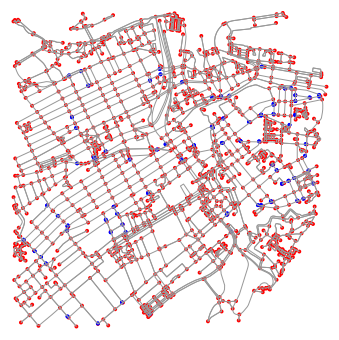

(<Figure size 630.034x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99b4566080>)

In [35]:
newColMap = [  "r" for k in range(1552) ] + ["b" for k in range(newNodes)]
ox.plot_graph(graphQcReduced,node_color=newColMap)

In [36]:
dfStreetEdgesWithDist=addStreetDistances(dfStreetEdges,dfNodesWithIndex) #Watch out! makie sure we have the correct node indices!

In [37]:
dfStreetEdgesWithDist.head(2)

index_x               Street   lngStart   latStart     lngEnd     latEnd  \
0        0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753   
1        1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131   

     idxStart      lng_x      lat_x      idxEnd      lng_y      lat_y  \
0  6336677267 -71.211626  46.808025  6336677312 -71.222580  46.801753   
1  6336677268 -71.228938  46.807552  6336677313 -71.220098  46.812131   

      distance  
0  1242.840335  
1   999.974438

In [38]:
numEdgesBefore=len(graphQcReduced.edges())
numEdgesBefore

3902

In [39]:
graphBeforeEdges= graphQcReduced.copy()
ox.plot_graph(graphBeforeEdges)

(<Figure size 630.034x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99b3aaab70>)

In [40]:
listNodeIndices = [nodeData[0] for nodeData in graphQcReduced.nodes.data() ]
np.all( np.isin( dfStreetEdgesWithDist["idxStart"], listNodeIndices) ) & \
np.all( np.isin( dfStreetEdgesWithDist["idxEnd"], listNodeIndices) )

True

In [41]:
#make sure correct indices
dfStreetEdgesWithDist.head()

index_x               Street   lngStart   latStart     lngEnd     latEnd  \
0        0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753   
1        1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131   
2        3    rue Saint-Gabriel -71.218576  46.810208 -71.222092  46.808695   
3        4         rue Aberdeen -71.228321  46.801381 -71.225280  46.803173   
4        5        rue Richelieu -71.228021  46.806901 -71.213253  46.813998   

     idxStart      lng_x      lat_x      idxEnd      lng_y      lat_y  \
0  6336677267 -71.211626  46.808025  6336677312 -71.222580  46.801753   
1  6336677268 -71.228938  46.807552  6336677313 -71.220098  46.812131   
2  6336677269 -71.218576  46.810208  6336677314 -71.222092  46.808695   
3  6336677270 -71.228321  46.801381  6336677315 -71.225280  46.803173   
4  6336677271 -71.228021  46.806901  6336677316 -71.213253  46.813998   

      distance  
0  1242.840335  
1   999.974438  
2   396.056662  
3   345.362076  
4  1667.399534

In [42]:
addEdgesGraph(graphQcReduced,dfStreetEdgesWithDist)
numEdgesAfter=len(graphQcReduced.edges)
len(graphQcReduced.nodes)

Added 45  edges to the graph


1730

In [43]:
numEdgesAfter-numEdgesBefore

45

In [44]:
newColMapEdges = [  "grey" for k in range(numEdgesBefore) ] + ["b" for k in range(numEdgesAfter-numEdgesBefore)]
ox.plot_graph(graphQcReduced,
              node_color=newColMap,
              edge_color=newColMapEdges,
              save =True,
              filename="qcGraphWithEdges.png",
              file_format="png",
             )

(<Figure size 618.015x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99ae7c14a8>)

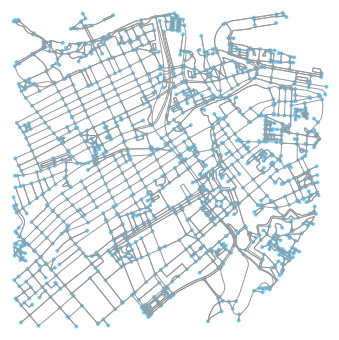

(<Figure size 630.034x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99b46ba0b8>)

In [45]:
ox.plot_graph(graphBeforeEdges)

In [46]:
getMinMaxLngLat(graphQcReduced,dfBox2by2)

y -- lat:  [6336677184, 6336677273] : 46.801154  --  [3950537815] : 46.8204949
x -- lng:  [6336677195, 6336677284] : -71.231359  --  [297030030] : -71.2036901


True

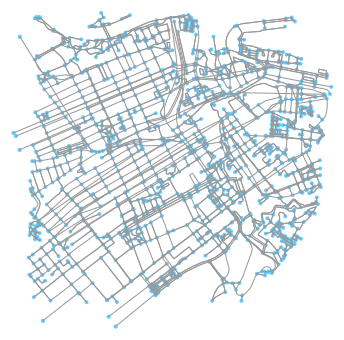

(<Figure size 426.445x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99b45a37b8>)

In [47]:
prjGraph=ox.project_graph(graphQcReduced)
ox.plot_graph(prjGraph)

In [48]:
 [v for k,v in enumerate(graphQcReduced.nodes.data())  if (k <= 10)]

[(2302763016,
  {'y': 46.8165129,
   'x': -71.2153963,
   'osmid': 2302763016,
   'highway': 'traffic_signals'}),
 (177516555, {'y': 46.8152708, 'x': -71.2080448, 'osmid': 177516555}),
 (177516556, {'y': 46.8154511, 'x': -71.2076415, 'osmid': 177516556}),
 (2302763022, {'y': 46.8177904, 'x': -71.2154746, 'osmid': 2302763022}),
 (2302763023, {'y': 46.8181079, 'x': -71.2158853, 'osmid': 2302763023}),
 (177516558, {'y': 46.8154432, 'x': -71.2071376, 'osmid': 177516558}),
 (2302763025, {'y': 46.8183058, 'x': -71.2155485, 'osmid': 2302763025}),
 (343556114, {'y': 46.8067807, 'x': -71.2068605, 'osmid': 343556114}),
 (2302763027, {'y': 46.8183295, 'x': -71.2158424, 'osmid': 2302763027}),
 (177516559, {'y': 46.8154301, 'x': -71.2066071, 'osmid': 177516559}),
 (3957116950, {'y': 46.8149995, 'x': -71.2141088, 'osmid': 3957116950})]

In [49]:
 [v for k,v in enumerate(graphQcReduced.nodes.data())  if (k <= numNodesBefore+1) &  (k >= numNodesBefore-2)]

[(180822010, {'y': 46.8176002, 'x': -71.2123942, 'osmid': 180822010}),
 (3957116923, {'y': 46.8120098, 'x': -71.2123556, 'osmid': 3957116923}),
 (6336677178, {'osmid': 6336677178, 'y': 46.808025, 'x': -71.211626}),
 (6336677179, {'osmid': 6336677179, 'y': 46.807552, 'x': -71.228938})]

In [50]:
 [v for k,v in enumerate(prjGraph.nodes.data())  if (k <= numNodesBefore+1) &  (k >= numNodesBefore-2)]

[(180822010,
  {'highway': nan,
   'osmid': 180822010,
   'ref': nan,
   'x': 331232.51138169033,
   'y': 5187271.506314093,
   'lon': -71.2123942,
   'lat': 46.8176002}),
 (3957116923,
  {'highway': nan,
   'osmid': 3957116923,
   'ref': nan,
   'x': 331217.95777513937,
   'y': 5186650.2314973585,
   'lon': -71.2123556,
   'lat': 46.8120098}),
 (6336677178,
  {'highway': nan,
   'osmid': 6336677178,
   'ref': nan,
   'x': 331261.15033702273,
   'y': 5186205.88283364,
   'lon': -71.211626,
   'lat': 46.808025}),
 (6336677179,
  {'highway': nan,
   'osmid': 6336677179,
   'ref': nan,
   'x': 329938.85879779345,
   'y': 5186190.658509029,
   'lon': -71.228938,
   'lat': 46.807552})]

In [51]:
[v for k,v in enumerate(prjGraph.edges.data())  if (k <= numEdgesBefore+1) &  (k >= numEdgesBefore-1)]

[(3957116923,
  177498222,
  {'osmid': 389627243,
   'lanes': '2',
   'name': "Rue D'Auteuil",
   'highway': 'residential',
   'oneway': False,
   'length': 50.397999999999996,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f99adfe30b8>,
   'color': 'grey'}),
 (6336677267,
  6336677312,
  {'name': 'custom_rue Wilfrid-Laurier',
   'highway': 'residential',
   'oneway': False,
   'color': 'grey',
   'length': 1242.8403351964937}),
 (6336677268,
  6336677313,
  {'name': 'custom_rue de la Tourelle',
   'highway': 'residential',
   'oneway': False,
   'color': 'b',
   'length': 999.9744381073122})]

In [52]:
numEdgesAfter=len(graphQcReduced.edges())  
print(len(graphBeforeEdges.edges()))
numEdgesAfter

3902


3947

In [53]:
#Ok since there is 1 repeated node (for st-jean), there should be 2*edges -1 distinct nodes added
dfStreetEdgesWithDist.shape

(45, 13)

In [54]:
dfPlaques=pd.read_csv(os.path.join(ROOT_DIR,"Data","Csv","NoLngLat", "AllNeighbourhoods" , "plaquesTidy.csv"),delimiter=",")
dfPlaques

Name  \
0                                     Alleyn, Edmund   
1                                      Angers, Henri   
2                                       Beetz, Johan   
3                                  Belley, Henriette   
4                                    Blatter, Robert   
5                                  Bonenfant, Claire   
6                                     Boulet, Lionel   
7                                     Dallaire, Jean   
8                                      Dessane, Léon   
9                           Edwards, William Bertram   
10  Faucher de Saint-Maurice, Narcisse-Henri-Édouard   
11                         Gilbert, Joseph-Alexandre   
12                                 Gingras, Philippe   
13                                     Hudon, Simone   
14                                      Jobin, Louis   
15                                  Le May, Pamphile   
16                                Lemieux, Jean-Paul   
17                                       Malone, Joe   
18                                   Moisan, Laurent   
19                                  Morisset, Gérard   
20                                       Pagé, Lewis   
21                          Peachy, Joseph-Ferdinand   
22                           Picard-Jobin, Françoise   
23                                  Pollack, Maurice   
24                                       Roy, Berthe   
25                                Sauvageau, Wilfrid   
26                                   Staveley, Harry   
27                                    Vézina, Joseph   
28                           BRUNET, Wilfrid-Étienne   
29                                     CARREL, James   
..                                               ...   
40                  AUBERT DE GASPÉ, Philippe-Joseph   
41                                    BALDWIN, Betty   
42                       BARROT-CHÊNEVERT, Henriette   
43                                 BERNIER, Françoys   
44                            BOSWELL, Joseph Knight   
45                           CAILLAUD-SIMARD, Marthe   
46                                   DIESBOURG, Anna   
47                                     DRUM, William   
48                          ELLISSON, George William   
49                                     ÉMOND, Pierre   
50                              FAFARD-DROLET, Adine   
51                                    GAGNON, Ernest   
52                                   HAMEL, Philippe   
53                          HERZBERG SERCHUK, Berthe   
54                                     HUOT, Charles   
55                  LABELLE, François-Xavier-Antoine   
56                                  LACOURCIÈRE, Luc   
57                                LAFRANCE, Ambroise   
58                    LE MOINE, Sir James MacPherson   
59                                    MCKENNA, James   
60                                 MCKENZI, Francine   
61                                  MCMAHON, Patrick   
62                                   MOHR, Sigismund   
63                                  OCELLIER, Victor   
64                                RANVOYZÉ, François   
65                                  ROUSSEAU, Albert   
66                          ROUTHIER, Adolphe-Basile   
67                         SAINT-EXUPÉRY, Antoine de   
68                             SAVARD, Félix-Antoine   
69                                    SIROIS, Joseph   

                                              Address      Neighbourhood  \
0                             85, rue Wilfrid-Laurier  SaintJeanBaptiste   
1                             166, rue de la Tourelle  SaintJeanBaptiste   
2                          16, avenue Wilfrid-Laurier  SaintJeanBaptiste   
3                              559, rue Saint-Gabriel  SaintJeanBaptiste   
4                                    49, rue Aberdeen  SaintJeanBaptiste   
5                                  889, rue Richelieu  SaintJeanBaptiste   
6                              530, rue Sai

In [55]:
np.any(dfPlaques["Street"].str.contains(".*[jJ]ean"))
cond=dfPlaques.Street.str.contains(".*[jJ]ean")
numPlaquesStJean=dfPlaques[cond.astype("bool")].dropna().shape[0]
numPlaquesStJean

7

In [58]:

idxSJB=~np.isin( [ re.match("rue Saint-Jean sjb", s) for s in  dfStreetEdgesWithDist["Street"]],  None)
distStJeanSJB=dfStreetEdgesWithDist.loc[idxSJB , "distance"].values[0]

idxVieuxQc=~np.isin( [ re.match("rue Saint-Jean vieu*.", s) for s in  dfStreetEdgesWithDist["Street"]],  None)
distStJeanVieuxQc=dfStreetEdgesWithDist.loc[idxVieuxQc, "distance" ].values[0]
print(distStJeanSJB, distStJeanVieuxQc)

1321.7621749510274 745.3345650176882


In [59]:
distStJean=np.sum( dfStreetEdgesWithDist.loc[dfStreetEdgesWithDist["Street"].str.contains(".*[Ss]aint-Jean").astype(bool), "distance"])
distStJean

2067.0967399687156

In [60]:
dfStreetEdgesWithDistAndNeigh=pd.merge( dfPlaques, dfStreetEdgesWithDist, 
         on="Street",
        how="left")
#dfStreetEdgesWithDistAndNeigh

In [61]:
#dfCountPlaquesPerStreet=pd.DataFrame( {"count":dfStreetEdgesWithDistAndNeigh.groupby("Street").agg({"index_x":"count", "Neighbourhood":"unique"})  } )
#dfStreetEdgesWithDistAndNeigh.groupby("Street").agg({"index_x":"count", "Neighbourhood":"unique"})
#dfStreetEdgesWithDistAndNeigh.groupby(["Street","Neighbourhood"]).count()

In [62]:
dfCountPlaquesPerStreet=pd.DataFrame( {"count":dfStreetEdgesWithDistAndNeigh.groupby(["Street","Neighbourhood"]).count()["Name"]}).reset_index()
dfCountPlaquesPerStreet

Street      Neighbourhood  count
0           Grande Allée Est  SaintJeanBaptiste      2
1           Grande-Allée Est  SaintJeanBaptiste      1
2              avenue Daulac          SaintRoch      1
3    avenue Sainte-Geneviève        VieuxQuebec      1
4     avenue Wilfrid-Laurier  SaintJeanBaptiste      2
5             côte du Palais        VieuxQuebec      1
6             côte d’Abraham  SaintJeanBaptiste      1
7               rue Aberdeen  SaintJeanBaptiste      1
8                 rue Burton  SaintJeanBaptiste      1
9               rue Christie        VieuxQuebec      1
10             rue Couillard        VieuxQuebec      2
11          rue De Bernières  SaintJeanBaptiste      1
12  rue De Saint-Vallier Est          SaintRoch      2
13            rue Dorchester          SaintRoch      1
14           rue D’Aiguillon  SaintJeanBaptiste      1
15             rue D’Auteuil        VieuxQuebec      1
16               rue Ferland        VieuxQuebec      1
17                rue Hébert        VieuxQuebec      3
18              rue Lockwell  SaintJeanBaptiste      2
19  rue Monseigneur-De Laval        VieuxQuebec      1
20  rue Monseigneur-De-Laval        VieuxQuebec      1
21           rue Mont-Carmel        VieuxQuebec      1
22  rue Notre-Dame-des-Anges          SaintRoch      1
23       rue Philippe-Dorval  SaintJeanBaptiste      1
24             rue Richelieu  SaintJeanBaptiste      3
25    rue Saint-François Est          SaintRoch      1
26         rue Saint-Gabriel  SaintJeanBaptiste      1
27            rue Saint-Jean  SaintJeanBaptiste      4
28            rue Saint-Jean        VieuxQuebec      3
29      rue Saint-Joseph Est          SaintRoch      1
30           rue Saint-Louis        VieuxQuebec      1
31         rue Saint-Olivier  SaintJeanBaptiste      2
32            rue Saint-Paul        VieuxQuebec      2
33       rue Saint-Stanislas        VieuxQuebec      1
34          rue Saint-Ursule        VieuxQuebec      2
35           rue Sainte-Anne        VieuxQuebec      1
36        rue Sainte-Famille        VieuxQuebec      1
37         rue Sainte-Ursule        VieuxQuebec      1
38                 rue Scott  SaintJeanBaptiste      1
39              rue Turnbull  SaintJeanBaptiste      1
40       rue Wilfrid-Laurier  SaintJeanBaptiste      1
41           rue de la Porte        VieuxQuebec      1
42        rue de la Tourelle  SaintJeanBaptiste      2
43           rue des Grisons        VieuxQuebec      1
44          rue des Remparts        VieuxQuebec      2
45            rue du Parloir        VieuxQuebec      1
46             rue du Parvis          SaintRoch      1
47                rue du Roi          SaintRoch      3

In [63]:
dfStreetEdgesWithDist.head()

index_x               Street   lngStart   latStart     lngEnd     latEnd  \
0        0  rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753   
1        1   rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131   
2        3    rue Saint-Gabriel -71.218576  46.810208 -71.222092  46.808695   
3        4         rue Aberdeen -71.228321  46.801381 -71.225280  46.803173   
4        5        rue Richelieu -71.228021  46.806901 -71.213253  46.813998   

     idxStart      lng_x      lat_x      idxEnd      lng_y      lat_y  \
0  6336677267 -71.211626  46.808025  6336677312 -71.222580  46.801753   
1  6336677268 -71.228938  46.807552  6336677313 -71.220098  46.812131   
2  6336677269 -71.218576  46.810208  6336677314 -71.222092  46.808695   
3  6336677270 -71.228321  46.801381  6336677315 -71.225280  46.803173   
4  6336677271 -71.228021  46.806901  6336677316 -71.213253  46.813998   

      distance  
0  1242.840335  
1   999.974438  
2   396.056662  
3   345.362076  
4  1667.399534

In [64]:

dfCountPlaquesPerStreetWithDist=pd.merge(dfCountPlaquesPerStreet, dfStreetEdgesWithDist,  on="Street",how="left")
#dfCountPlaquesPerStreetWithDist

In [65]:
idxSJB= (dfCountPlaquesPerStreetWithDist["Street"] == "rue Saint-Jean") & \
(dfCountPlaquesPerStreetWithDist["Neighbourhood"] == "SaintJeanBaptiste")

np.where(idxSJB)
type(idxSJB.astype(bool))

dfCountPlaquesPerStreetWithDist.loc[idxSJB ,] 

Street      Neighbourhood  count  index_x  lngStart  latStart  \
27  rue Saint-Jean  SaintJeanBaptiste      4      NaN       NaN       NaN   

    lngEnd  latEnd  idxStart  lng_x  lat_x  idxEnd  lng_y  lat_y  distance  
27     NaN     NaN       NaN    NaN    NaN     NaN    NaN    NaN       NaN

In [66]:

idxSJB= (dfCountPlaquesPerStreetWithDist["Street"] == "rue Saint-Jean") & \
(dfCountPlaquesPerStreetWithDist["Neighbourhood"] == "SaintJeanBaptiste")

idxVieuxQc= (dfCountPlaquesPerStreetWithDist["Street"] == "rue Saint-Jean") & \
(dfCountPlaquesPerStreetWithDist["Neighbourhood"] == "VieuxQuebec")

#dfCountPlaquesPerStreetWithDist.loc[idxSJB , "count"] = numPlaquesStJean
dfCountPlaquesPerStreetWithDist.loc[idxSJB.astype(bool) , "distance"] = distStJeanSJB

#dfCountPlaquesPerStreetWithDist.loc[idxSJB , "count"] = numPlaquesStJean
dfCountPlaquesPerStreetWithDist.loc[idxVieuxQc.astype(bool) , "distance"] = distStJeanVieuxQc

dfCountPlaquesPerStreetWithDist

Street      Neighbourhood  count  index_x   lngStart  \
0           Grande Allée Est  SaintJeanBaptiste      2      NaN        NaN   
1           Grande-Allée Est  SaintJeanBaptiste      1     17.0 -71.222752   
2              avenue Daulac          SaintRoch      1     21.0 -71.224163   
3    avenue Sainte-Geneviève        VieuxQuebec      1     47.0 -71.209141   
4     avenue Wilfrid-Laurier  SaintJeanBaptiste      2      NaN        NaN   
5             côte du Palais        VieuxQuebec      1     30.0 -71.212467   
6             côte d’Abraham  SaintJeanBaptiste      1     13.0 -71.222952   
7               rue Aberdeen  SaintJeanBaptiste      1      4.0 -71.228321   
8                 rue Burton  SaintJeanBaptiste      1     12.0 -71.221684   
9               rue Christie        VieuxQuebec      1     48.0 -71.208095   
10             rue Couillard        VieuxQuebec      2     29.0 -71.209135   
11          rue De Bernières  SaintJeanBaptiste      1      7.0 -71.221944   
12  rue De Saint-Vallier Est          SaintRoch      2     23.0 -71.223101   
13            rue Dorchester          SaintRoch      1     24.0 -71.231054   
14           rue D’Aiguillon  SaintJeanBaptiste      1      8.0 -71.214731   
15             rue D’Auteuil        VieuxQuebec      1     33.0 -71.213164   
16               rue Ferland        VieuxQuebec      1     28.0 -71.206322   
17                rue Hébert        VieuxQuebec      3     35.0 -71.206288   
18              rue Lockwell  SaintJeanBaptiste      2     11.0 -71.227089   
19  rue Monseigneur-De Laval        VieuxQuebec      1      NaN        NaN   
20  rue Monseigneur-De-Laval        VieuxQuebec      1     40.0 -71.206293   
21           rue Mont-Carmel        VieuxQuebec      1     36.0 -71.207408   
22  rue Notre-Dame-des-Anges          SaintRoch      1     27.0 -71.230792   
23       rue Philippe-Dorval  SaintJeanBaptiste      1     15.0 -71.226983   
24             rue Richelieu  SaintJeanBaptiste      3      5.0 -71.228021   
25    rue Saint-François Est          SaintRoch      1     22.0 -71.224910   
26         rue Saint-Gabriel  SaintJeanBaptiste      1      3.0 -71.218576   
27            rue Saint-Jean  SaintJeanBaptiste      4      NaN        NaN   
28            rue Saint-Jean        VieuxQuebec      3      NaN        NaN   
29      rue Saint-Joseph Est          SaintRoch      1     25.0 -71.231147   
30           rue Saint-Louis        VieuxQuebec      1     46.0 -71.211960   
31         rue Saint-Olivier  SaintJeanBaptiste      2      6.0 -71.226094   
32            rue Saint-Paul        VieuxQuebec      2     34.0 -71.215740   
33       rue Saint-Stanislas        VieuxQuebec      1     43.0 -71.212295   
34          rue Saint-Ursule        VieuxQuebec      2     38.0 -71.212354   
35           rue Sainte-Anne        VieuxQuebec      1     37.0 -71.209313   
36        rue Sainte-Famille        VieuxQuebec      1     41.0 -71.206653   
37         rue Sainte-Ursule        VieuxQuebec      1     44.0 -71.212413   
38                 rue Scott  SaintJeanBaptiste      1     16.0 -71.221426   
39              rue Turnbull  SaintJeanBaptiste      1     18.0 -71.220741   
40       rue Wilfrid-Laurier  SaintJeanBaptiste      1      0.0 -71.211626   
41           rue de la Porte        VieuxQuebec      1     32.0 -71.206378   
42        rue de la Tourelle  SaintJeanBaptiste      2      1.0 -71.228938   
43           rue des Grisons        VieuxQuebec      1     42.0 -71.206856   
44          rue des Remparts        VieuxQuebec      2     39.0 -71.211780   
45            rue du Parloir        VieuxQuebec      1     31.0 -71.208192   
46             rue du Parvis          SaintRoch      1     26.0 -71.222104   
47                rue du Roi          SaintRoch      3     20.0 -71.231359   

     latStart     lngEnd     latEnd      idxStart      lng_x      lat_x  \
0         NaN        NaN        NaN           NaN        NaN        NaN   
1   46.802777 -71.212004  46.808976  6.336677e+09

In [67]:
dfCountPlaquesPerStreetWithDistClean=dfCountPlaquesPerStreetWithDist.loc[:, ["Street","count","distance","Neighbourhood"]].dropna()
dfCountPlaquesPerStreetWithDistClean.sort_values(by="Street",ascending=False)

Street  count     distance      Neighbourhood
47                rue du Roi      3  1543.711224          SaintRoch
46             rue du Parvis      1   373.620116          SaintRoch
45            rue du Parloir      1    39.880092        VieuxQuebec
44          rue des Remparts      2   832.811571        VieuxQuebec
43           rue des Grisons      1    91.045984        VieuxQuebec
42        rue de la Tourelle      2   999.974438  SaintJeanBaptiste
41           rue de la Porte      1    94.912333        VieuxQuebec
40       rue Wilfrid-Laurier      1  1242.840335  SaintJeanBaptiste
39              rue Turnbull      1   534.037995  SaintJeanBaptiste
38                 rue Scott      1   122.785402  SaintJeanBaptiste
37         rue Sainte-Ursule      1   471.054028        VieuxQuebec
36        rue Sainte-Famille      1    76.943433        VieuxQuebec
35           rue Sainte-Anne      1   434.515770        VieuxQuebec
34          rue Saint-Ursule      2   466.709077        VieuxQuebec
33       rue Saint-Stanislas      1   166.326335        VieuxQuebec
32            rue Saint-Paul      2   742.785083        VieuxQuebec
31         rue Saint-Olivier      2   933.253041  SaintJeanBaptiste
30           rue Saint-Louis      1   733.298095        VieuxQuebec
29      rue Saint-Joseph Est      1  1527.197070          SaintRoch
28            rue Saint-Jean      3   745.334565        VieuxQuebec
27            rue Saint-Jean      4  1321.762175  SaintJeanBaptiste
26         rue Saint-Gabriel      1   396.056662  SaintJeanBaptiste
25    rue Saint-François Est      1   728.380113          SaintRoch
24             rue Richelieu      3  1667.399534  SaintJeanBaptiste
23       rue Philippe-Dorval      1   193.842016  SaintJeanBaptiste
22  rue Notre-Dame-des-Anges      1   698.263523          SaintRoch
21           rue Mont-Carmel      1   248.622660        VieuxQuebec
20  rue Monseigneur-De-Laval      1   133.641910        VieuxQuebec
18              rue Lockwell      2   670.437659  SaintJeanBaptiste
17                rue Hébert      3   222.236405        VieuxQuebec
16               rue Ferland      1   107.849155        VieuxQuebec
15             rue D’Auteuil      1   448.957305        VieuxQuebec
14           rue D’Aiguillon      1  1185.179149  SaintJeanBaptiste
13            rue Dorchester      1   774.949317          SaintRoch
12  rue De Saint-Vallier Est      2  1105.398881          SaintRoch
11          rue De Bernières      1   400.454594  SaintJeanBaptiste
10             rue Couillard      2   117.581418        VieuxQuebec
9               rue Christie      1    18.671606        VieuxQuebec
8                 rue Burton      1   111.208117  SaintJeanBaptiste
7               rue Aberdeen      1   345.362076  SaintJeanBaptiste
6             côte d’Abraham      1   652.661985  SaintJeanBaptiste
5             côte du Palais      1   262.555762        VieuxQuebec
3    avenue Sainte-Geneviève      1   485.381590        VieuxQuebec
2              avenue Daulac      1    74.199332          SaintRoch
1           Grande-Allée Est      1  1219.761271  SaintJeanBaptiste

In [77]:
dfCountPlaquesPerStreetWithDistClean.groupby("Neighbourhood").agg({'distance': "mean"})

distance
Neighbourhood                
SaintJeanBaptiste  749.813528
SaintRoch          853.214947
VieuxQuebec        330.529247

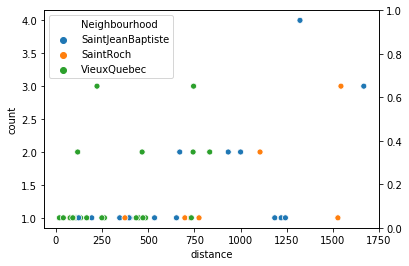

In [68]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots()

sns.scatterplot(x="distance",
              y="count",
              hue="Neighbourhood",
              data=dfCountPlaquesPerStreetWithDistClean,
               ax=ax)

ax2 = ax.twinx()

In [69]:
import statsmodels.api as sm
dfWithConst=sm.add_constant(dfCountPlaquesPerStreetWithDistClean["distance"])

In [70]:
lm=sm.OLS( dfCountPlaquesPerStreetWithDistClean["count"],dfWithConst) 
lmFit=lm.fit()
const=lmFit.params[0]
coeff=lmFit.params[1]

In [71]:
lmFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.18
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           0.000748
Time:                        20:46:00   Log-Likelihood:                -44.592
No. Observations:                  45   AIC:                             93.18
Df Residuals:                      43   BIC:                             96.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9635      0.161      5.993      0.000       0.639       1.288
distance       0.0008      0.000      3.630      0.001       0.000       0.001
==============================================================================
Omnibus:                       13.763   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.080
Skew:                           1.138   Prob(JB):                     0.000531
Kurtosis:                       4.692   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
def predictLM(x,const,coeff):
     return(const+coeff*x)

In [73]:
dfLin=pd.DataFrame( {"x": [ np.min(dfCountPlaquesPerStreetWithDistClean["distance"]) ,  np.max(dfCountPlaquesPerStreetWithDistClean["distance"]) ] } )
dfLin["pred"]=dfLin["x"].apply(lambda x : predictLM(x,const,coeff) )

In [74]:
dfLin

x      pred
0    18.671606  0.978481
1  1667.399534  2.299411

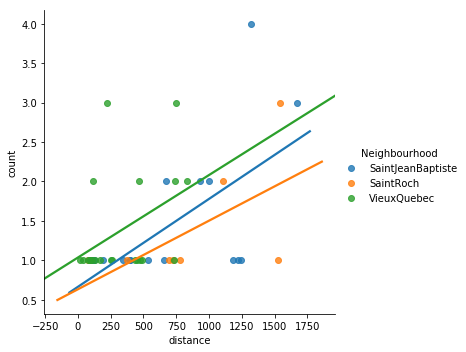

In [76]:
sbPlot=sns.lmplot(x="distance",
              y="count",
              hue="Neighbourhood",
              data=dfCountPlaquesPerStreetWithDistClean,
              ci =None )
sbPlot.savefig("scatterPlotNumberPlaquesByNeighbour.png")

In [ ]:
import re

strName="Rue D'Auteuil"
re.match(strName, "Rue D'Auteuilss" )

dist={}
dist[strName]=0
numErrors=0
df=pd.DataFrame()
for u,v, edge in graphQcReduced.edges(data=True):
    try:
        grepResults=re.match(strName, edge["name"] )
        if grepResults.group(0) is not None:
            dist[strName]=dist[strName]+ edge['length']
        df=df.concat(edge)
    except Exception as e:
        #print("error at " , u,v)
        numErrors=numErrors+1
        
        
dist[strName]
df

In [ ]:
#[re.match("[aA]uteuil", s) for s in dfStreetEdgesWithDist["Street"]]
#re.match("[aA]uteuil", dfStreetEdgesWithDist["Street"].values)

print(re.match( ".*[aA]uteuil.*",  "rue D’Auteuil"))
rez=re.search( ".*[aA]uteuil.*",  "rue D’Auteuil")
rez.group(0) is not None

In [45]:
dfNodes.tail()
graph.add_node(dummyStart+i , 
                        x=dfNodes.loc[i,"lng"] , 
                        y=dfNodes.loc[i,"lat"])

index        lng        lat
84  6336677351 -71.210863  46.813189
85  6336677352 -71.208329  46.809760
86  6336677353 -71.205474  46.812345
87  6336677354 -71.204809  46.810766
88  6336677355 -71.208106  46.814731

In [43]:
 [e for k, e in enumerate( graphQcReduced.nodes.data()  ) if  (k >= len(graphQcReduced.nodes)-10) ]

[(6336677307, {}),
 (6336677351, {}),
 (6336677308, {}),
 (6336677352, {}),
 (6336677309, {}),
 (6336677353, {}),
 (6336677310, {}),
 (6336677354, {}),
 (6336677311, {}),
 (6336677355, {})]

In [48]:
[v  for k,v in enumerate(graphQcReduced.edges.data()) if (k >= numEdgesBefore-1) & (k <= numEdgesBefore+1)]

[(3957116923,
  177498222,
  {'osmid': 389627243,
   'lanes': '2',
   'name': "Rue D'Auteuil",
   'highway': 'residential',
   'oneway': False,
   'length': 50.397999999999996,
   'geometry': <shapely.geometry.linestring.LineString at 0x7efcd07d59e8>,
   'color': 'grey'}),
 (6336677267,
  6336677312,
  {'name': 'custom_rue Wilfrid-Laurier',
   'highway': 'residential',
   'oneway': False,
   'color': 'grey',
   'length': 1242.8403351964937}),
 (6336677268,
  6336677313,
  {'name': 'custom_rue de la Tourelle',
   'highway': 'residential',
   'oneway': False,
   'color': 'b',
   'length': 999.9744381073122})]

In [54]:
[v  for k,v in enumerate(graphQcReduced.nodes.data()) if (k >= numNodesBefore-1) & (k <= numNodesBefore+1)]

[(3957116923, {'y': 46.8120098, 'x': -71.2123556, 'osmid': 3957116923}),
 (6336677178, {'x': -71.211626, 'y': 46.808025}),
 (6336677179, {'x': -71.228938, 'y': 46.807552})]

In [433]:
listDict=[ edge for   u,v, edge in graphBeforeEdges.edges(data=True)]
type(listDict[0])
regexRez=re.search('(?<=Boulevard )|(?<=Rue )|(?<=Avenue )+' ,listDict[0]["name"]) 
startPos=regexRez.span()[0]
listDict[0]["name"][startPos: ]

'Jean-Lesage'

In [402]:
m = re.search('(?<=abc)\w+', 'abcdef')
m.group(0)

'def'

In [419]:
listDict[1]["name"]

'Rue Vallière'

In [446]:
re.match('.*Wilfrid-Laurier.*', 'rue Wilfrid-Laurier', re.IGNORECASE)

<_sre.SRE_Match object; span=(0, 19), match='rue Wilfrid-Laurier'>

In [449]:
import re


dist={}
numErrors=0
df=pd.DataFrame()

for strName in dfStreetEdgesWithDist["Street"]:
    dist[strName]=0
    for u,v, edge in graphBeforeEdges.edges(data=True):
        try:
            regexRez=re.search('(?<=Boulevard )|(?<=Rue )|(?<=Avenue )+' ,edge["name"]) 
            startPos=regexRez.span()[0]
        
            strFind=edge["name"][startPos: ]
           
            
            ignorecase = re.compile( ".*" + strFind  + ".*", re.IGNORECASE)
            grepResults=ignorecase.match( strName )
            
            #print(startPos,strCompare ,strName, grepResults)
            if grepResults.group(0) is not None:
                dist[strName]=dist[strName]+ edge['length']
            df=df.concat(edge)
        except Exception as e:
            #print("error at " , u,v)
            numErrors=numErrors+1

In [459]:
dfStreetsOSMDist=pd.DataFrame.from_dict(dist, orient="index").reset_index().rename(columns={"index":"Street", 0: "distOSM"})
dfStreetsOSMDist.head()

Street   distOSM
0  rue Wilfrid-Laurier  1225.380
1   rue de la Tourelle   857.313
2    rue Saint-Gabriel   321.265
3         rue Aberdeen   113.852
4        rue Richelieu  1363.852

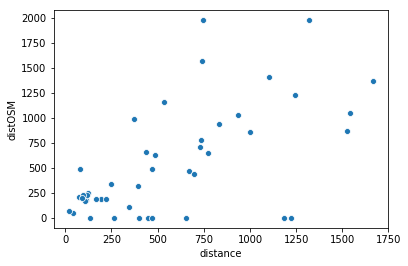

In [470]:
dfDistCompare=pd.merge(dfStreetEdgesWithDist ,dfStreetsOSMDist , how="left", on="Street")
scatterPlotValidDist=sns.scatterplot(x="distance",
                y="distOSM",
                data=dfDistCompare )
#scatterPlotValidDist.set_title("Validating manual and osm street distance")


In [471]:
scatterPlotValidDist.savefig("scatterPlotValidDist.png")

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [ ]:
scatterPlotValidDist.get_figure